## Метрики моделей классификации 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from sklearn.datasets import load_iris

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.neighbors import KNeighborsClassifier 

##### Визуал контейнера ###
from sklearn import set_config
set_config(display="diagram")


import sklearn
#pip install --upgrade scikit-learn
sklearn.__version__


'1.0.2'

In [2]:

iris=load_iris()


#iris.target = np.where(iris.target==2,0,iris.target)
iris.target = np.where(iris.target<=1,1,0)
iris.target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=7, 
                                                     test_size=0.5, stratify=iris.target)

kfold = KFold(n_splits=5, shuffle=True, random_state=1)


pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier', KNeighborsClassifier())])

n_neighbors=[1, 2, 3, 4, 8, 12, 16, 20, 22, 24, 26, 30, 34, 38]
p=[1,2,3,10]
weights=['uniform','distance']

param_grid =[
    {'preprocessing': [MinMaxScaler(), StandardScaler(),RobustScaler(),Normalizer()], 
     'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights
     }
]

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid=[{'classifier': [KNeighborsClassifier(n_neighbors=3)],
                          'classifier__n_neighbors': [1, 2, 3, 4, 8, 12, 16, 20,
                                                      22, 24, 26, 30, 34, 38],
                          'classifier__p': [1, 2, 3, 10],
                          'classifier__weights': ['uniform', 'distance'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True)

In [4]:
gridresults = pd.DataFrame(grid.cv_results_)
display(gridresults.sort_values(["rank_test_score"]).T)

,75,119,79,83,67,91,111,127,43,167,...,410,426,425,433,442,419,443,435,427,434
mean_fit_time,0.000597,0.000553,0.000567,0.000612,0.000623,0.000633,0.000566,0.000527,0.000513,0.000542,...,0.001084,0.001016,0.000533,0.000536,0.00105,0.000477,0.000449,0.000452,0.000444,0.001068
std_fit_time,0.00007,0.000045,0.000053,0.000072,0.000053,0.000067,0.000048,0.000003,0.000006,0.000033,...,0.000071,0.000009,0.000005,0.000003,0.000028,0.000044,0.000003,0.000004,0.000001,0.00004
mean_score_time,0.000943,0.000657,0.000647,0.001051,0.001091,0.001053,0.000633,0.000656,0.000826,0.000634,...,0.000876,0.000771,0.000765,0.000819,0.000833,0.000827,0.000878,0.000868,0.000801,0.000839
std_score_time,0.000071,0.000021,0.000061,0.000089,0.000213,0.000135,0.000022,0.000006,0.000015,0.000033,...,0.000091,0.000004,0.000002,0.000002,0.000004,0.00005,0.000017,0.000016,0.000003,0.00001
param_classifier,KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),...,KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3),KNeighborsClassifier(n_neighbors=3)
param_classifier__n_neighbors,3,4,3,3,3,3,4,4,2,12,...,34,38,38,38,38,38,38,38,38,38
param_classifier__p,2,3,2,3,1,10,2,10,2,1,...,10,2,2,3,10,1,10,3,2,3
param_classifier__weights,uniform,distance,distance,uniform,uniform,uniform,distance,distance,uniform,distance,...,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform
param_preprocessing,Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),...,RobustScaler(),RobustScaler(),StandardScaler(),StandardScaler(),RobustScaler(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),RobustScaler()
params,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...


In [5]:
# по порядку, но не очень удачно поменяйте числа
res = gridresults.sort_values(["rank_test_score"])
res[res['rank_test_score']==1].sort_index()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__n_neighbors,param_classifier__p,param_classifier__weights,param_preprocessing,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
75,0.000597,0.000070,0.000943,0.000071,KNeighborsClassifier(n_neighbors=3),3,2,uniform,Normalizer(),{'classifier': KNeighborsClassifier(n_neighbor...,...,0.986667,0.026667,1,1.0,0.983333,0.983333,0.983333,0.983333,0.986667,0.006667
119,0.000553,0.000045,0.000657,0.000021,KNeighborsClassifier(n_neighbors=3),4,3,distance,Normalizer(),{'classifier': KNeighborsClassifier(n_neighbor...,...,0.986667,0.026667,1,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [6]:
# ранги моделей (внутри промежутков спрятаны модели одинакового ранга)
res['rank_test_score'].unique()

array([  1,   3,  17,  19,  87, 185, 237, 241, 260, 286, 299, 325, 345,
       352, 356, 360, 362, 368, 370, 376, 387, 395, 417, 424, 426, 428,
       430, 436, 437, 438, 441, 443, 444, 446], dtype=int32)

In [7]:
res[res['rank_test_score']==446].head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__n_neighbors,param_classifier__p,param_classifier__weights,param_preprocessing,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
435,0.000452,0.000004,0.000868,0.000016,KNeighborsClassifier(n_neighbors=3),38,3,uniform,Normalizer(),{'classifier': KNeighborsClassifier(n_neighbor...,...,0.693333,0.200444,446,0.7,0.683333,0.900000,0.916667,0.683333,0.776667,0.107806
427,0.000444,0.000001,0.000801,0.000003,KNeighborsClassifier(n_neighbors=3),38,2,uniform,Normalizer(),{'classifier': KNeighborsClassifier(n_neighbor...,...,0.693333,0.200444,446,0.7,0.683333,0.883333,0.916667,0.683333,0.773333,0.104137
434,0.001068,0.000040,0.000839,0.000010,KNeighborsClassifier(n_neighbors=3),38,3,uniform,RobustScaler(),{'classifier': KNeighborsClassifier(n_neighbor...,...,0.693333,0.108321,446,0.7,0.800000,0.783333,0.766667,0.833333,0.776667,0.044222


In [8]:
### Внимание без контроля memory контейнеры пишутся друг по другу!!!
from joblib import Memory
memory = Memory()


from sklearn.pipeline import make_pipeline

preproc_1, model_1 = map(grid.cv_results_['params'][75].get, ['preprocessing','classifier'])

pipe_best=make_pipeline(preproc_1, model_1, memory = memory)
pipe_best.fit(X_train, y_train)
y_best = pipe_best.predict(X_test)


display(pipe_best.score(X_train, y_train))
display(pipe_best.score(X_test, y_test))
pipe_best


0.9866666666666667

0.9733333333333334

Pipeline(memory=Memory(location=None),
         steps=[('normalizer', Normalizer()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [9]:
preproc_2, model_2 = map(grid.cv_results_['params'][434].get, ['preprocessing','classifier'])

pipe_fail = make_pipeline(preproc_2, model_2, memory = memory)
pipe_fail.fit(X_train, y_train)
y_fail = pipe_fail.predict(X_test)

display(pipe_fail.score(X_train, y_train))
display(pipe_fail.score(X_test, y_test))
pipe_fail

0.9733333333333334

0.92

Pipeline(memory=Memory(location=None),
         steps=[('robustscaler', RobustScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

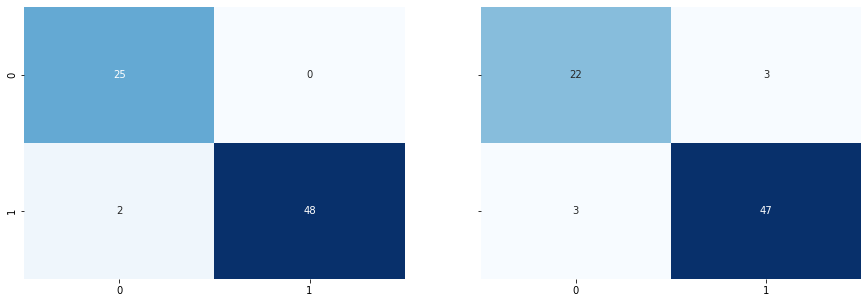

In [10]:
from sklearn.metrics import confusion_matrix

matrix_1=confusion_matrix(y_test,y_best)
matrix_2=confusion_matrix(y_test,y_fail)


fig,ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,5))
ax = plt.subplot(1, 2, 1)
sns.heatmap(matrix_1,annot=True, fmt='g', cbar=None,cmap="Blues");
ax = plt.subplot(1, 2, 2)
sns.heatmap(matrix_2,annot=True, fmt='g', cbar=None,cmap="Blues");


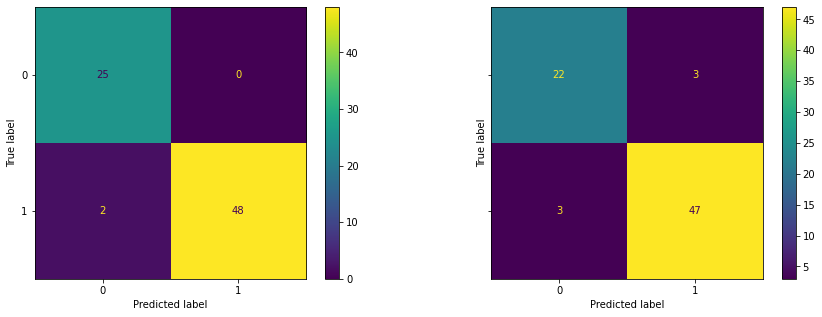

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

fig, [ax1, ax2] = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,5))

ConfusionMatrixDisplay(matrix_1).plot(ax = ax1);
ConfusionMatrixDisplay(matrix_2).plot(ax = ax2);

In [12]:
from sklearn.metrics import f1_score

print ( 'лучшая ', f1_score(y_test, y_best) )
print ( 'худшая ', f1_score(y_test, y_fail) )

лучшая  0.9795918367346939
худшая  0.94


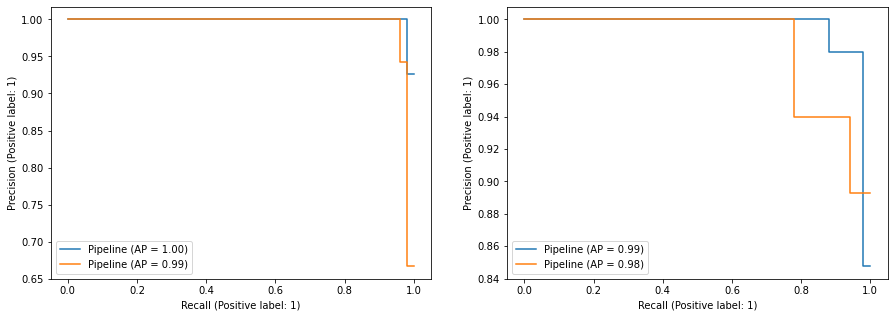

In [13]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 5))

### Внимание контейнеры пишутся друг по другу . Будьте осторожны не теряйте fit для вычислений!!!

pipe_best.fit(X_train, y_train)
y_best = pipe_best.predict(X_test)
PrecisionRecallDisplay.from_estimator(pipe_best, X_train, y_train,ax = ax1);
PrecisionRecallDisplay.from_estimator(pipe_best, X_test, y_test,ax = ax1);

pipe_fail.fit(X_train, y_train)
PrecisionRecallDisplay.from_estimator(pipe_fail, X_train, y_train, ax = ax2);
PrecisionRecallDisplay.from_estimator(pipe_fail, X_test, y_test, ax = ax2);


#### Внимание PrecisionRecallDisplay.from_predictions НЕЛЬЗЯ брать результат команды predict
#### подробнее тут https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_best))
print(classification_report(y_test, y_fail))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.96      0.98        50

    accuracy                           0.97        75
   macro avg       0.96      0.98      0.97        75
weighted avg       0.98      0.97      0.97        75

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        25
           1       0.94      0.94      0.94        50

    accuracy                           0.92        75
   macro avg       0.91      0.91      0.91        75
weighted avg       0.92      0.92      0.92        75



In [15]:
### В зависимости от метода ML, можно узнать с какой вероятностью распределились классы
### регулируюя порог можно улучшить решение 
pipe_fail.predict_proba(X_test)

array([[1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.

thresholds: [0.33333333 0.66666667 1.        ]


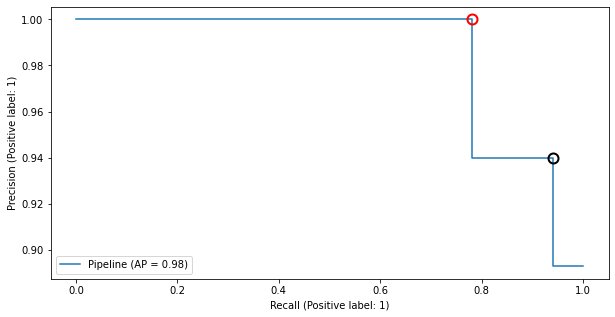

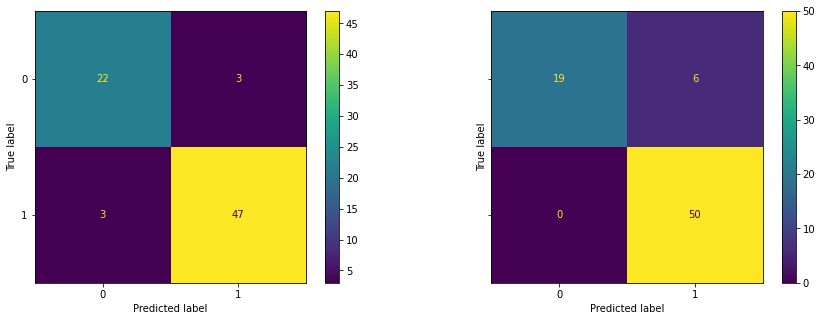

In [16]:
pipe_fail.fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, pipe_fail.predict_proba(X_test)[:,1])
#print('precision :',precision, '   recall: ',recall, '   thresholds:', thresholds)
print('thresholds:', thresholds)

threshold = 0.5
pos = np.searchsorted(thresholds,threshold)
#pos = np.argmin(np.abs(thresholds))

fig = plt.figure(figsize=(10, 5))
ax_mid = fig.add_subplot(111)

PrecisionRecallDisplay.from_estimator(pipe_fail,  X_test, y_test, ax = ax_mid)
ax_mid.plot(recall[pos],precision[pos], 'o', markersize=10,
label="порог 0.5", fillstyle="none", c='k', mew=2)


threshold_new = 0.75
pos = np.searchsorted(thresholds,threshold_new)

ax_mid.plot(recall[pos],precision[pos], 'o', markersize=10,
label="порог 0.5", fillstyle="none", c='r', mew=2)



predicted = pipe_fail.predict_proba(X_test)
x_predicted_ths_50 = (predicted[:,0] < threshold).astype('int')
x_predicted_ths_75 = (predicted[:,0] < threshold_new).astype('int')

matrix_1=confusion_matrix(y_test,x_predicted_ths_50)
matrix_2=confusion_matrix(y_test,x_predicted_ths_75)

fig, [ax1, ax2] = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,5))

ConfusionMatrixDisplay(matrix_1).plot(ax = ax1);
ConfusionMatrixDisplay(matrix_2).plot(ax = ax2);

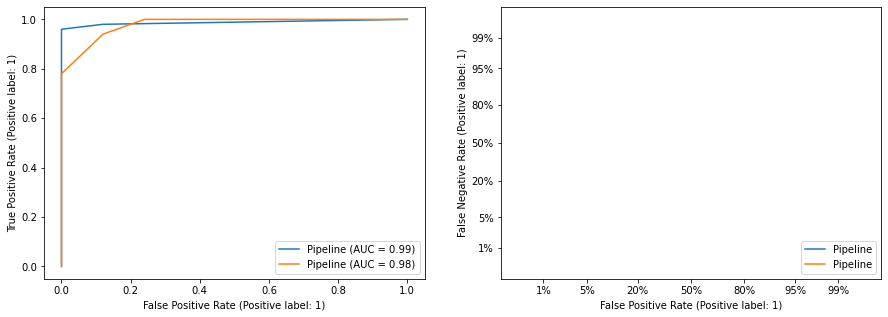

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import det_curve
from sklearn.metrics import DetCurveDisplay

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(15, 5))

pipe_best.fit(X_train, y_train)
RocCurveDisplay.from_estimator(pipe_best,X_test, y_test, ax = ax_roc)
DetCurveDisplay.from_estimator(pipe_best,X_test, y_test, ax = ax_det)

pipe_fail.fit(X_train, y_train)
RocCurveDisplay.from_estimator(pipe_fail, X_test, y_test, ax = ax_roc)
DetCurveDisplay.from_estimator(pipe_fail,X_test, y_test, ax = ax_det);
